# How to find the optimal number of topics for LDA?

My approach to finding the optimal number of topics is to build many LDA models with different values of number of topics (k) and pick the one that gives the highest coherence value.

Based on [Gensim Topic Modeling](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)

In [16]:
import os
import sys
import matplotlib.pyplot as plt
import gensim
import pyLDAvis
import pyLDAvis.gensim

from gensim import corpora
from gensim import models
from gensim.models.coherencemodel import CoherenceModel

print('Python Version: %s' % (sys.version))
%matplotlib inline

Python Version: 2.7.15 | packaged by conda-forge | (default, Feb 28 2019, 04:00:11) 
[GCC 7.3.0]


In [9]:
dictionary = corpora.Dictionary.load('documents.dict')
corpus = corpora.MmCorpus('documents.mm')
lda_model = models.LdaModel.load('lda_model')
ldamallet = models.wrappers.LdaMallet.load('ldamallet')

print(dictionary)
print(corpus)
print(lda_model)
print(ldamallet)

Dictionary(7714 unique tokens: [u'francesco', u'csuci', u'univesidad', u'sation', u'efimenko']...)
MmCorpus(4 documents, 7714 features, 10760 non-zero entries)
LdaModel(num_terms=7714, num_topics=20, decay=0.5, chunksize=100)


Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics.

If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.

The `compute_performance()` (see below) trains multiple LDA models and provides the models and their corresponding coherence and perplexityscores.

In [41]:
def compute_performance(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence and perplexity for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    perplexity_values : Perplexity values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    perplexity_values = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                num_topics=num_topics, 
                                                id2word=dictionary,
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        perplexity = model.log_perplexity(corpus)
        perplexity_values.append(perplexity)

    return model_list, coherence_values, perplexity_values

In [42]:
# Can take a long time to run.
model_list, coherence_values, perplexity_values = compute_performance(dictionary=dictionary, 
                                                        corpus=corpus, 
                                                        texts=lemmatized_output, 
                                                        start=2, limit=40, step=1)

/home/storopoli/anaconda3/envs/topic-modeling/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


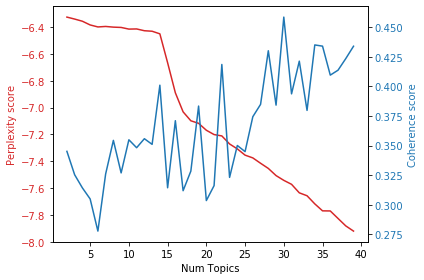

In [44]:
# Show graph
limit=40; start=2; step=1;
x = range(start, limit, step)
fig, ax1 = plt.subplots()
color = 'tab:red'
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score", color=color)
ax1.plot(x, perplexity_values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Coherence score', color=color)  # we already handled the x-label with ax1
ax2.plot(x, coherence_values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [45]:
# Print the coherence scores
count = 0
for m, cv, per in zip(x, coherence_values, perplexity_values):
    print('Model number: ', count, "Num Topics =", m, 
          " has Coherence Value of", round(cv, 3),
         " and Perplexity Valye of", round(per, 3))
    count += 1

Model number:  0 Num Topics = 2  has Coherence Value of 0.345  and Perplexity Valye of -6.325
Model number:  1 Num Topics = 3  has Coherence Value of 0.325  and Perplexity Valye of -6.34
Model number:  2 Num Topics = 4  has Coherence Value of 0.314  and Perplexity Valye of -6.356
Model number:  3 Num Topics = 5  has Coherence Value of 0.305  and Perplexity Valye of -6.384
Model number:  4 Num Topics = 6  has Coherence Value of 0.278  and Perplexity Valye of -6.399
Model number:  5 Num Topics = 7  has Coherence Value of 0.326  and Perplexity Valye of -6.395
Model number:  6 Num Topics = 8  has Coherence Value of 0.354  and Perplexity Valye of -6.4
Model number:  7 Num Topics = 9  has Coherence Value of 0.327  and Perplexity Valye of -6.402
Model number:  8 Num Topics = 10  has Coherence Value of 0.355  and Perplexity Valye of -6.415
Model number:  9 Num Topics = 11  has Coherence Value of 0.348  and Perplexity Valye of -6.414
Model number:  10 Num Topics = 12  has Coherence Value of 0.3

In [47]:
# Select the model and print the topics
optimal_model = model_list[12]
model_topics = optimal_model.show_topics(formatted=True)
optimal_model.print_topics(num_words=20)

[(0,
  '0.042*"process" + 0.039*"caracterís" + 0.035*"seleç" + 0.033*"public" + 0.033*"periód" + 0.032*"performanc" + 0.026*"instituc" + 0.023*"desempenh" + 0.023*"management" + 0.021*"polít" + 0.020*"recrut" + 0.020*"revist" + 0.019*"dirig" + 0.015*"stakehold" + 0.014*"estratég" + 0.014*"domíni" + 0.014*"hospital" + 0.013*"inserç" + 0.013*"ambi" + 0.012*"administration"'),
 (1,
  '0.080*"competi" + 0.070*"capac" + 0.064*"vantag" + 0.043*"dinâm" + 0.032*"diferenci" + 0.026*"conceit" + 0.026*"dimens" + 0.024*"serviç" + 0.023*"inov" + 0.022*"desempenh" + 0.020*"organizac" + 0.019*"posi" + 0.018*"process" + 0.017*"ambi" + 0.012*"desenvolv" + 0.012*"intelig" + 0.012*"raridad" + 0.012*"inimit" + 0.011*"implement" + 0.011*"necessár"'),
 (2,
  '0.070*"estratég" + 0.036*"conceit" + 0.036*"abord" + 0.026*"model" + 0.025*"gest" + 0.017*"perspec" + 0.016*"bibliométr" + 0.016*"bsc" + 0.014*"process" + 0.013*"cit" + 0.012*"evoluç" + 0.011*"futur" + 0.011*"empr" + 0.011*"demand" + 0.010*"relacion" +

In [21]:
optimal_model.save('optimal_model')

/home/storopoli/anaconda3/envs/topic-modeling/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
